## EXERCÍCIO

In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Base de dados
df = pd.read_csv('./csv_result-ebay_confianca_completo.csv')
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [3]:
# Informação
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 2 to 5807
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   feedbacks                5806 non-null   int64  
 1   reviews                  5806 non-null   int64  
 2   blacklist                5806 non-null   object 
 3   mextraversion            5806 non-null   float64
 4   cextraversion            5806 non-null   float64
 5   sextraversion            5806 non-null   int64  
 6   mneuroticism             5806 non-null   float64
 7   cneuroticism             5806 non-null   float64
 8   sneuroticism             5806 non-null   int64  
 9   mconscientiousness       5806 non-null   float64
 10  cconscientiousness       5806 non-null   float64
 11  sconscientiousness       5806 non-null   int64  
 12  magreeableness           5806 non-null   float64
 13  cagreeableness           5806 non-null   float64
 14  sagreeableness          

In [4]:
# Verificando o tamanho
df.shape

(5806, 75)

In [5]:
# Dividido as classes
previsores = df.iloc[:, 0:74].values
classe = df.iloc[:,74].values

In [6]:
# Transformação dos atributos categóricos em atributos numéricos, passando o 
# índice de cada atributo categórico
labelencoder = LabelEncoder()
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])

In [7]:
# Divisão da base de dados entre treinamento e teste 
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    previsores, classe, test_size = 0.2, stratify=classe
)

In [8]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier()
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [9]:
# Visualização dos atributos principais
floresta.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=1186827130)

In [10]:
# Fazendo a previsões
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto


0.7478485370051635

<AxesSubplot: >

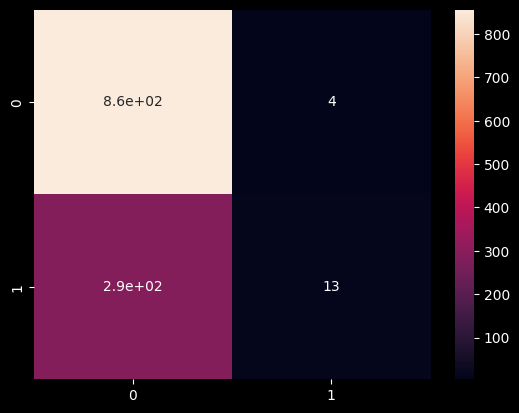

In [11]:
# Visualizando
sns.heatmap(confusao, annot=True)

### Subamostragem(undersampling) - Tomek Linhs

In [12]:
# Biblioteca
from imblearn.under_sampling import TomekLinks

In [13]:
# Criando a Subamostragem
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(previsores, classe)

In [14]:
# Verificando o tamanho
X_under.shape, y_under.shape

((5417, 74), (5417,))

In [15]:
# Criando a Variáveis de Treinamento e teste
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(
    X_under, y_under, test_size=0.2, stratify=y_under
)
X_treinamento_u.shape, X_teste_u.shape

((4333, 74), (1084, 74))

In [16]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta_u = RandomForestClassifier()
floresta_u.fit(X_treinamento_u, y_treinamento_u)

RandomForestClassifier()

In [17]:
# Previsão
previsoes_u = floresta_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.735239852398524

In [18]:
# Criando a matrix de confusão 
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[773, 278],
       [  9,  24]], dtype=int64)

### Sobreamostragem (Oversampling) - SMOTE

In [19]:
# Importação da Biblioteca
from imblearn.over_sampling import SMOTE

In [20]:
# Criando a variável 
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(previsores, classe)
# Tamanho
X_over.shape, y_over.shape

((8598, 74), (8598,))

In [21]:
# Criando o treinamento e o teste
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(
    X_over, y_over, test_size = 0.2, stratify=y_over
)
# Tamanho
X_treinamento_o.shape, X_teste_o.shape

((6878, 74), (1720, 74))

In [22]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta_o = RandomForestClassifier()
floresta_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = floresta_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8220930232558139

In [23]:
# Criando a matrix de confusão 
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[700, 146],
       [160, 714]], dtype=int64)

<AxesSubplot: >

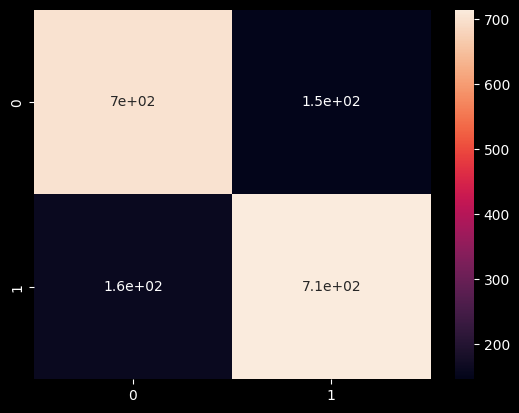

In [24]:
# mapa de calor
sns.heatmap(cm_o, annot=True)